<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_08/Class_008_object_detection_001_Finding_stones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
!gdown 1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp

Downloading...
From: https://drive.google.com/uc?id=1EMAqxWAIDJXqZv4qyAK-mDbx3X-uh7jp
To: /content/Machine_Learning_DataSet/find_stones_area.zip
100% 113M/113M [00:00<00:00, 228MB/s] 


In [4]:
FILE='find_stones_area.zip'

In [5]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [6]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [7]:
img_name

['20221103_143120quarter.jpg',
 '20221103_143130quarter.jpg',
 '20221103_143149quarter.jpg',
 '20221103_143438quarter.jpg',
 '20221103_143444quarter.jpg',
 '20221103_143448quarter.jpg',
 '20221103_143450quarter.jpg',
 '20221103_143502quarter.jpg',
 '20221103_143816quarter.jpg',
 '20221103_143823quarter.jpg',
 '20221103_143932quarter.jpg',
 '20221103_143938quarter.jpg',
 '20221103_143943quarter.jpg',
 '20221103_143949quarter.jpg',
 '20221103_144433half.jpg',
 '20221103_144440half.jpg',
 '20221103_144448half.jpg',
 '20221103_144502half.jpg',
 '20221103_144506half.jpg',
 '20221103_144807half.jpg',
 '20221103_144816half.jpg',
 '20221103_144826half.jpg',
 '20221103_144845half.jpg',
 '20221103_144848half.jpg',
 '20221103_144856half.jpg',
 '20221103_145212half.jpg',
 '20221103_145214half.jpg',
 '20221103_145217half.jpg',
 '20221103_145349half.jpg',
 '20221103_145359half.jpg',
 '20221103_145404half.jpg',
 '20221103_145408half.jpg',
 '20221103_145413half.jpg',
 '20221103_145434half.jpg',
 '2022

In [8]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [9]:
waldo =  cv2.imread('pedra.jpg',0)

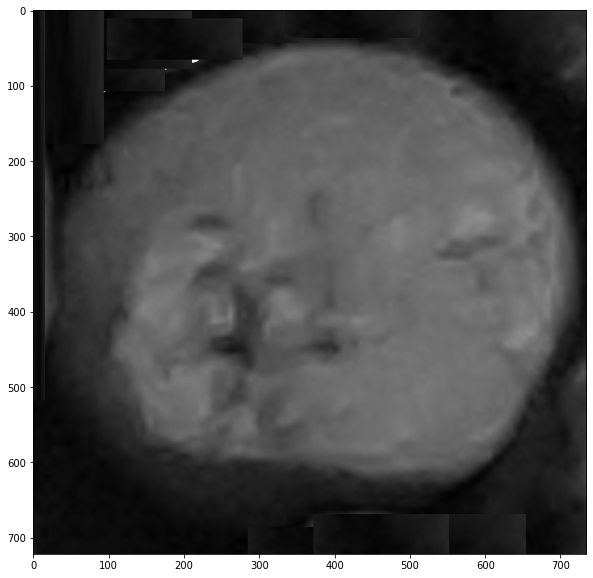

In [10]:
display(waldo)

In [11]:
WaldoBeach = cv2.imread('20221103_143816quarter.jpg',0)

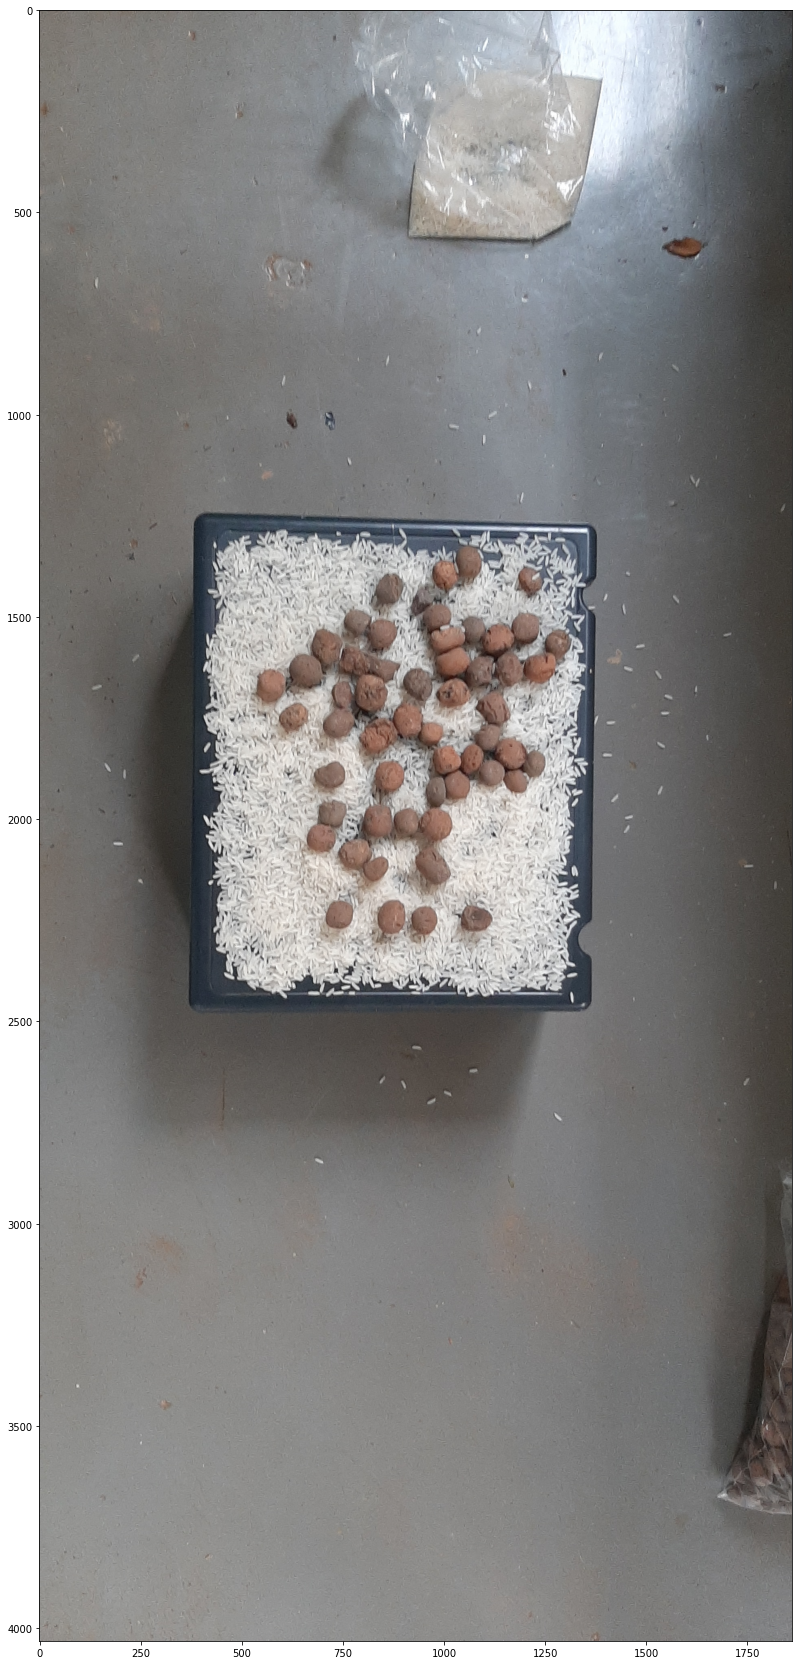

In [12]:
plt.figure(figsize=(30, 30))
plt.imshow(cv2.cvtColor(cv2.imread('20221103_143816quarter.jpg'), cv2.COLOR_BGR2RGB))

--------
# Brute Force Detection with ORB Descriptors

In [13]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(waldo,None)
kp2, des2 = orb.detectAndCompute(WaldoBeach,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
waldo_matches = cv2.drawMatches(waldo,kp1,WaldoBeach,kp2,matches[:25],None,flags=2)

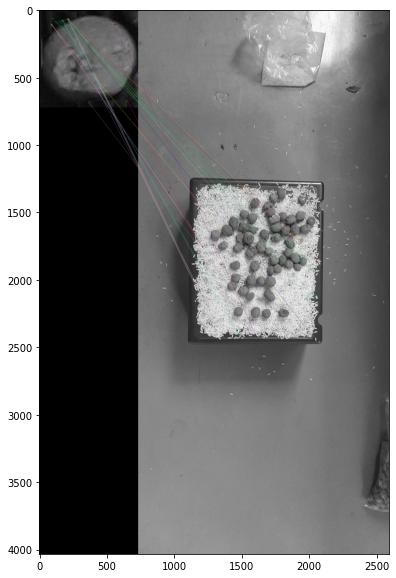

In [14]:
display(waldo_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [15]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,good,None,flags=2)

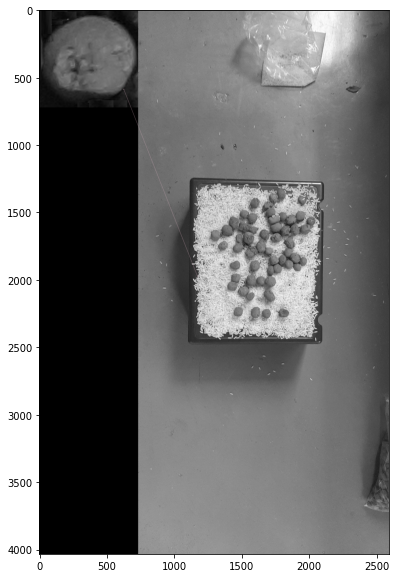

In [16]:
display(sift_matches)

# FLANN based Matcher

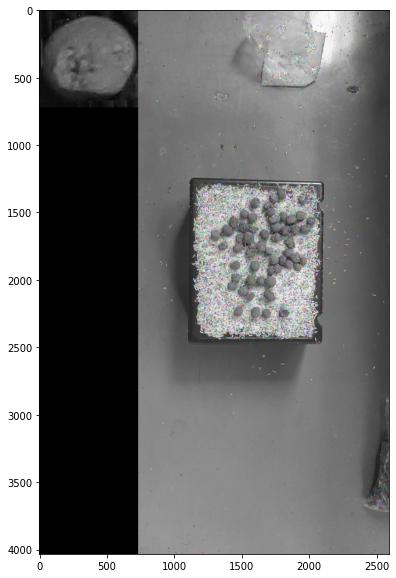

In [17]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,good,None,flags=0)

display(flann_matches)

In [18]:
des1

array([[36., 69.,  2., ...,  3.,  1.,  4.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [60., 44.,  0., ...,  4.,  3.,  5.],
       ...,
       [ 2., 10.,  7., ...,  0.,  0.,  0.],
       [33.,  0.,  0., ...,  4., 25., 34.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.]], dtype=float32)

In [19]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,matches,None,**draw_params)

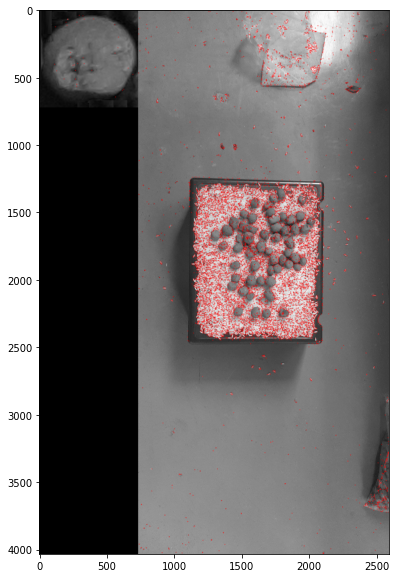

In [20]:
display(flann_matches)